In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# IV.12.8(e)

In [3]:
def derivtive(f, x_0, h):
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)

def nu_tone(f, x_0, derivtive_accuracy):
    return -1 / derivtive(f, x_0, derivtive_accuracy)

def fixed_point_iteration(f, alpha, x_0, derivtive_accuracy):
    x_1 = x_0 + alpha(f, x_0, derivtive_accuracy) * f(x_0)
    while (abs(x_1 - x_0) > derivtive_accuracy):
        x_0 = x_1
        x_1 = x_0 + alpha(f, x_0, derivtive_accuracy) * f(x_0)
    return x_1

In [4]:
def main():
    x_max = 1 / 2
    dec = 3
    eps = math.pow(10, -dec)

    def f(x): return math.sqrt(x) * math.exp(-x)
    def g(x): return f(x) - f(x_max) / 2

    x_1 = fixed_point_iteration(g, nu_tone, eps, eps)
    x_2 = fixed_point_iteration(g, nu_tone, 2, eps)

    print("x_max =", x_max)
    print("f(x_max) = ", round(f(x_max), dec))
    print("x_1 = ", round(x_1, dec))
    print("x_2 = ", round(x_2, dec))
    print("delta = ", round(abs(x_2 - x_1), dec))

main()

x_max = 0.5
f(x_max) =  0.429
x_1 =  0.051
x_2 =  1.846
delta =  1.795


In [5]:
# VI.9.32

In [6]:
def nu_tone_approximation(x, y, x_0):
    
    def f(i, j = None):
        if j is None or i == j:
            return y[i]
        if j == i + 1:
            return (y[i] - y[j]) / (x[i] - x[j])
        else:
            k = j - i
            return (f(i + 1, i + k) - f(i, i + k - 1)) / (x[i + k] - x[i])
    
    P = 0
    for i in range(len(x)):
        x_multiply = 1
        for j in range(i):
            x_multiply *= (x_0 - x[j])
        P += x_multiply * f(0, i)
    return int(P)

def spline_approximation(x, y, x_0):
    def h(i): return x[i] - x[i - 1]
    def u_2(i): return (y[i] - y[i - 1]) / h(i)
    def u_3(i): return (u_2(i) - u_2(i - 1)) / (x[i] - x[i - 2])
    a = y
    b = np.zeros(len(x))
    d = np.zeros(len(x))
    A = np.zeros((len(x), len(x)))
    l = np.zeros(len(x))
    for i in range (1, len(x) - 1):
        l[i] = 6 * u_3(i + 1)
        if i > 1: A[i][i - 1] = h(i) / (h(i) + h(i + 1))
        A[i][i] = 2
        if i < len(x) - 2: A[i][i + 1] = h(i + 1) / (h(i) + h(i + 1))
    
    A_ = np.zeros((len(x) - 2, len(x) - 2))
    l_ = np.zeros(len(x) - 2)
    for i in range (1, len(x) - 1):
        for j in range(1, len(x) - 1):
            A_[i - 1][j - 1] = A[i][j]
            l_[i - 1] = l[i]
    
    c = np.append(np.append(0, np.linalg.solve(A_, l_)), 0)
    b[1] = c[1] * h(1) / 3 + u_2(1)
    d[1] = h(1) / c[1]
    for i in range(1, len(x)):
        b[i] = c[i] * h(i) / 3 + c[i - 1] * h(i) / 6 + u_2(i)
        d[i] = (c[i] - c[i - 1]) / h(i)
    
    i = 0
    while i < len(x) - 1 and x[i] < x_0 : i += 1
    return int(a[i] + b[i] * (x_0 - x[i]) + c[i] * math.pow((x_0 - x[i]), 2) / 2 + d[i] * math.pow((x_0 - x[i]), 3) / 6)

Newton extrapolation for year 2010 - 827906509
Spline extrapolation for year 2010 - 314133939
Real USA population at year 2010 - 308745538
Newton differnce - 519160971
Spline differnce - 5388401


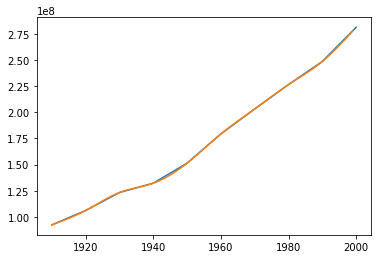

In [17]:
def main():
    x = [ 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000 ]
    y = [ 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906 ]
    
    print('Newton extrapolation for year 2010 -', nu_tone_approximation(x, y, 2010))
    print('Spline extrapolation for year 2010 -', spline_approximation(x, y, 2010))
    print('Real USA population at year 2010 -', 308745538)
    print('Newton differnce -', nu_tone_approximation(x, y, 2010) - 308745538)
    print('Spline differnce -', spline_approximation(x, y, 2010) - 308745538)

    a_ = np.arange(1910, 2000, 1)
    b_ = np.zeros(a_.size)
    c_ = np.zeros(a_.size)
    for i in range(a_.size): b_[i] = spline_approximation(x, y, a_[i])
    for i in range(a_.size): c_[i] = nu_tone_approximation(x, y, a_[i])

#     plt.plot(x, y)
    plt.plot(x, y)
    plt.plot(a_, b_)
#     plt.plot(a_, c_)

main()

In [8]:
# Practical 1

In [9]:
def main():
    dec = 6
    eps = math.pow(10, -dec)

    def f(x): return math.pow(x, 2) + math.pow(math.tan(x), 2) - 1
    x_1 = fixed_point_iteration(f, nu_tone, 0.5, eps)
    x_2 = fixed_point_iteration(f, nu_tone, -0.5, eps)

    print("x_1 = {}".format(round(x_1, dec)), math.tan(x_1))
    print("x_2 = {}".format(round(x_2, dec)), math.tan(x_2))

main()

x_1 = 0.649889 0.7600291816777508
x_2 = -0.649889 -0.7600291816777508


In [10]:
# Practical 2

In [11]:
def main():
    x = [ 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000 ]
    y = [ 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906 ]
    
    x_0 = 1950
    eps = math.pow(10, 1)
    def f(x_0): return spline_approximation(x, y, x_0)
    while(derivtive(f, x_0, eps) != derivtive(f, x_0, eps / 2)):
        eps = eps / 2
    print('derivative: {}, delta_h: {} year ({} hours)'.format(derivtive(f, x_0, eps), eps, round(365 * 24 * eps, 2)))
    
main()

derivative: 2583552.0, delta_h: 0.0048828125 year (42.77 hours)


In [12]:
# Practical 3

In [13]:
h = math.pow(10, -5)
eps = math.pow(10, -6)
print('h: {}, eps: {}'.format(h, eps))

def F(x):
    return math.sin(100 * x) * math.exp(-x * x) * math.cos(2 * x)

def gaussian_method(F, a, b):
    return (b - a) * (F((a + b) / 2 - (b - a) / (2 * math.sqrt(3))) + F((a + b) / 2 + (b - a) / (2 * math.sqrt(3)))) / 2

def trapezoid_method(F, a, b):
    return (b - a) * (F(a) + F(b)) / 2

def simpson_method(F, a, b):
    return (b - a) * (F(a) + 4 * F((a + b) / 2) + F(b)) / 6

def _3_8_method(F, a, b):
    return (b - a) * (F(a) + 3 * F((2 * a + b) / 3) + 3 * F((a + 2 * b) / 3) + F(b)) / 8

def integrate(F, a, b, delta, method):
    s, i = 0, a
    while i <= b:
        s += method(F, i, i + delta)
        i += delta
    return s;

def y_v_task(h = h, maethod = trapezoid_method, p = 2):
    I_h = integrate(F, 0, 3, h, trapezoid_method)
    I_h_2 = integrate(F, 0, 3, h / 2, trapezoid_method)
    error = (I_h_2 - I_h) / (math.pow(2, p) - 1)
    answer_I, answer_h = I_h, h
    if (abs(error) > eps) :
        answer_I, answer_h = y_v_task(h / 2)
    return answer_I, answer_h

def main():
    result = y_v_task(h, trapezoid_method, 2)
    print('I: {}, h: {} trapezoid_method'.format(result[0], result[1]))

    result = y_v_task(h, simpson_method, 4)
    print('I: {}, h: {} simpson_method'.format(result[0], result[1]))

    result = y_v_task(h, _3_8_method, 4)
    print('I: {}, h: {} _3_8_method'.format(result[0], result[1]))

    result = y_v_task(h, gaussian_method, 2)
    print('I: {}, h: {} gaussian_method'.format(result[0], result[1]))
    
main()

h: 1e-05, eps: 1e-06
I: 0.010006097027000284, h: 1e-05 trapezoid_method
I: 0.010006097027000284, h: 1e-05 simpson_method
I: 0.010006097027000284, h: 1e-05 _3_8_method
I: 0.010006097027000284, h: 1e-05 gaussian_method
